In [1]:
# Import dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Generate cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
#Get API url 
url = "http://api.openweathermap.org/data/2.5/weather?q="
    
    
#See list of cities to get information and lists
#cities 

#Chose Cape Town to see other columns
#response = requests.get(url + "cape town" + "&appid=" + w_key)
#w_city_d = response.json()
#pprint(w_city_d)

# Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
#Temperature is in Kelvins so change the unit of measurement to F°
units = "imperial"
#Create lists for variables needed
all_cities = []
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

#Create a counter for sucessive API calls
city_count = 0
set_count = 1

In [5]:
# Print things at start of loop 
print("Beginning Data Retrieval")
print("------------------------------")
#Make loop for going trough cities 

for one_city in cities: 
 
    #Add exceptions in loop to avoid it stopping from missing city values 
    try:
        
    #query_url= f'{url}{one_city}&appid={w_key}&units={units}'
        query_url =url + one_city + "&appid=" + w_key +"&units=imperial"
        response = requests.get(query_url).json()
    
    
        city_count = city_count + 1
    #Append data series loop through cities will be used    
        all_cities.append(one_city)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_count > 49: 
            set_count += 1 
            city_count = 0 
        
        print(f'Processing Record {city_count} of {set_count}|{one_city}')
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

#Add intervals between queries to stay within API limits 
        time.sleep(2)



#Data retrieval is complete so announce it
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of 1|bluff
Processing Record 2 of 1|doha
Processing Record 3 of 1|belyy yar
Processing Record 4 of 1|owando
Processing Record 5 of 1|rikitea
Processing Record 6 of 1|constitucion
City not found. Skipping...
Processing Record 8 of 1|atuona
Processing Record 9 of 1|torbay
Processing Record 10 of 1|mataura
Processing Record 11 of 1|punta arenas
Processing Record 12 of 1|ginir
Processing Record 13 of 1|alofi
Processing Record 14 of 1|opportunity
Processing Record 15 of 1|ushuaia
City not found. Skipping...
Processing Record 17 of 1|tasiilaq
Processing Record 18 of 1|yulara
Processing Record 19 of 1|hilo
Processing Record 20 of 1|karratha
Processing Record 21 of 1|kalmunai
Processing Record 22 of 1|georgetown
Processing Record 23 of 1|albany
Processing Record 24 of 1|nikolskoye
Processing Record 25 of 1|egvekinot
Processing Record 26 of 1|maarianhamina
Processing Record 27 of 1|atbasar
Processing Record 28 of 1|kiet

Processing Record 36 of 5|tiksi
Processing Record 37 of 5|boyolangu
Processing Record 38 of 5|morro bay
Processing Record 39 of 5|mandalgovi
Processing Record 40 of 5|selam
Processing Record 41 of 5|mount gambier
Processing Record 42 of 5|mogocha
Processing Record 43 of 5|manadhoo
Processing Record 44 of 5|kikinda
Processing Record 45 of 5|sargatskoye
Processing Record 46 of 5|kruisfontein
Processing Record 47 of 5|khetia
Processing Record 48 of 5|brzeziny
Processing Record 49 of 5|sao joao da barra
Processing Record 0 of 6|yumen
Processing Record 1 of 6|xinyang
Processing Record 2 of 6|ahuimanu
Processing Record 3 of 6|bosaso
Processing Record 4 of 6|korla
Processing Record 5 of 6|yar-sale
Processing Record 6 of 6|hambantota
Processing Record 7 of 6|batemans bay
Processing Record 8 of 6|laramie
Processing Record 9 of 6|lompoc
Processing Record 10 of 6|kuytun
Processing Record 11 of 6|fort dodge
Processing Record 12 of 6|sorland
City not found. Skipping...
City not found. Skipping...
P

Processing Record 23 of 10|meulaboh
Processing Record 24 of 10|kyaikkami
Processing Record 25 of 10|tabora
Processing Record 26 of 10|ningxiang
Processing Record 27 of 10|cukai
Processing Record 28 of 10|caarapo
Processing Record 29 of 10|vredendal
Processing Record 30 of 10|cumra
Processing Record 31 of 10|manjacaze
Processing Record 32 of 10|letlhakane
Processing Record 33 of 10|buta
Processing Record 34 of 10|kondapalle
Processing Record 35 of 10|tazovskiy
Processing Record 36 of 10|pangody
Processing Record 37 of 10|bambous virieux
Processing Record 38 of 10|oriximina
Processing Record 39 of 10|coahuayana
Processing Record 40 of 10|moskovskiy
Processing Record 41 of 10|goma
Processing Record 42 of 10|soto la marina
Processing Record 43 of 10|bairiki
Processing Record 44 of 10|havelock
Processing Record 45 of 10|prieska
Processing Record 46 of 10|embonas
Processing Record 47 of 10|port elizabeth
Processing Record 48 of 10|lensk
Processing Record 49 of 10|ursulo galvan
Processing Rec

# Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [11]:
#Convert to pandas DataFrame (code from class)
weather_dict = ({"City":all_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

weather_df = pd.DataFrame.from_dict(weather_dict, orient='index').transpose()
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6,168.333,54,87,62,10,NZ,1619590223
1,doha,25.2867,51.5333,97,43,0,9.22,QA,1619590112
2,belyy yar,53.6039,91.3903,51.8,87,75,4.47,RU,1619590223
3,owando,-0.4819,15.8999,72.63,96,100,2.48,CG,1619590224
4,rikitea,-23.1203,-134.969,76.98,73,100,11.25,PF,1619590224


Inspect the data and remove the cities where the humidity > 100%.

In [12]:
#Export city data into a csv 
filename = "cities.csv"
weather_df.to_csv("../output/cities.csv", index=False, header=True)



In [15]:
#Get the indices of cities that have humidity over 100%.
weather_df["Humidity"].max()

100

Max humidity is not over 100% so we don't need to clean data. 

# Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max temperature (F°)')

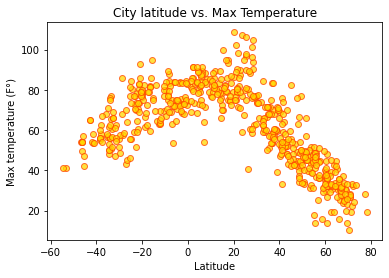

In [23]:
#Create variables 
latitude_p = weather_df["Lat"]
temp_p= weather_df["Max Temp"]

#Create scatterplot 
plt.scatter(latitude_p, temp_p, marker="o", facecolors="gold", edgecolors="orangered",
             alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F°)")

### Latitude vs. Humidity Plot

### Latitude vs. Cloudiness Plot

### Latitude vs. Wind Speed Plot

## Linear Regression

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression